# MobileNetV2

This notebooks' goal is to help you know basic things about MobileNetV2 and help you train your own dataset on it.

## What is it?

MobileNetV2 is a classification model developed by Google. It provides real-time classification capabilities under computing constraints in devices like smartphones or Raspberry Pi.

## Innovations With MobileNetV2

### Inverted Residual Stucture

THe MobileNetV2 architecture utilizes an **inverted residual structure** where the input and output of the residual blocks are **thin** bottleneck layers

It also uses lightweight convolutions to filter features in the expansion layer. Finally, it removes non-linearities in the narrow layers. The overall architecture looks something like this:

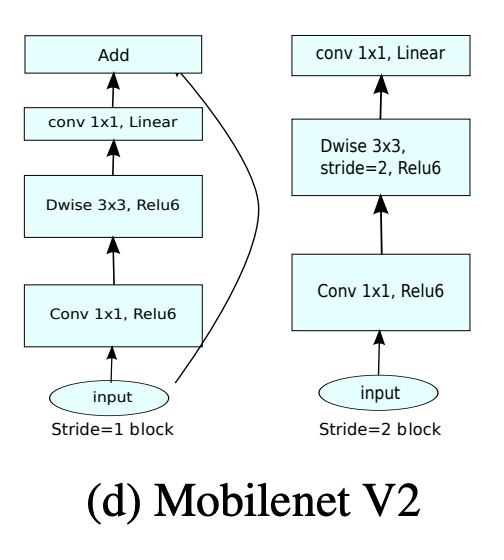

### Depthwise Separable Convolution

The MobileNetV2 also utilizes the Depthwise Separable Convolution Techniques to make it has less computation Burden, nmake it possible to run on computing constraints devices like our Pi.

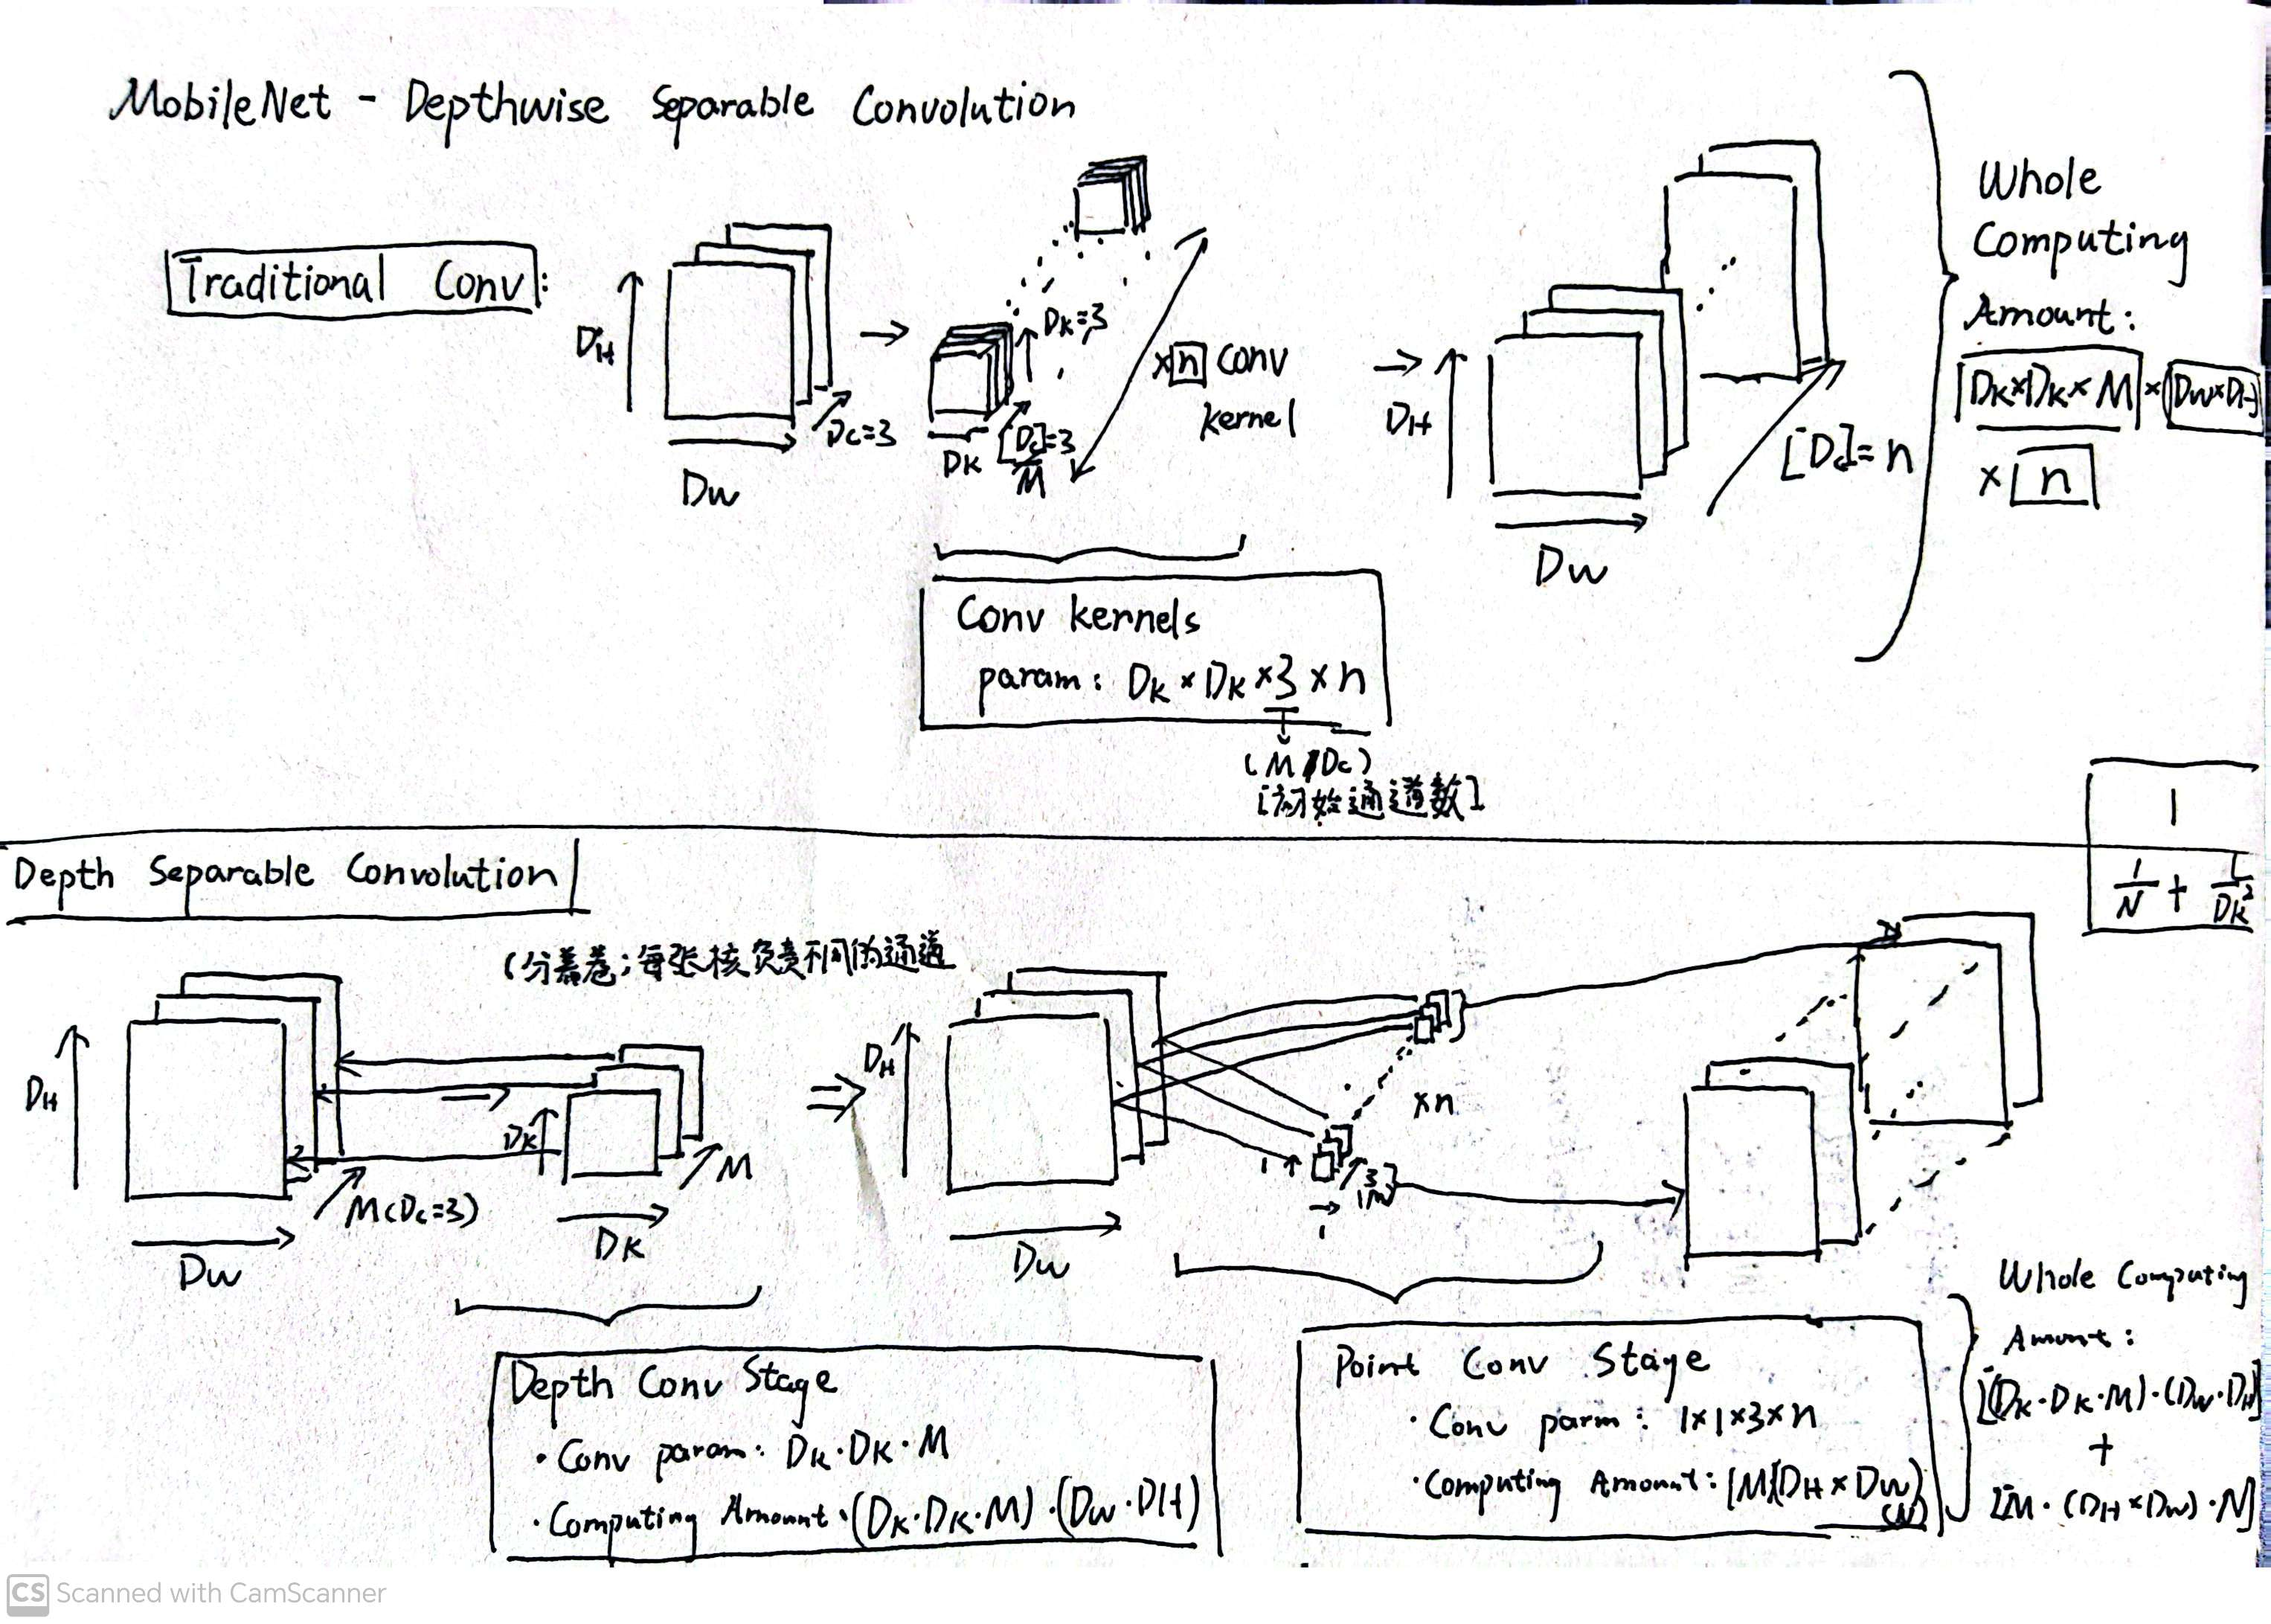


## Hands-On Tutorial

In this notebook, we will train a Model to classify the gesture in the game we have all played: Rock Paper Scissors.

### 1. Prepare dataset

Reference: [What is ImageFolder Format and How to use it in tensorflow?](https://www.tensorflow.org/datasets/api_docs/python/tfds/folder_dataset/ImageFolder)

We have prepared the dataset of Rock Paper Scissors for you at ./resource/datasets/Rock-Paper-Scissors in the ImageFolder Format, now you need to convert dataset into a Tensorflow Dataset.

In [ ]:
# run following code to convert dataset into a Tensorflow dataset
import tensorflow_datasets as tfds
builder = tfds.folder_dataset.ImageFolder('./resource/datasets/Rock-Paper-Scissors')
print(builder.info)
raw_train = builder.as_dataset(split='train', shuffle_files=True)
raw_test = builder.as_dataset(split='test', shuffle_files=True)

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_dir='resource/datasets/Rock-Paper-Scissors/image_folder/1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=1>,
    },
    citation="""""",
)


### 2. Constructing the MobileNetV2 Model

First we will create the base MobileNetV2 model:

In [ ]:
IMG_SHAPE = (300, 300, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')